# Import the packages

In [1]:
# import the packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')


## Section1: Read in the Florida data

In [2]:
fa = pd.read_csv('df_florida_only_grouped.txt')
fa.head()

,Year,State,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME
0,2007,Florida,FL,ALACHUA,242685,2007,9.525963e+07
1,2007,Florida,FL,BAKER,26212,2007,1.379379e+07
2,2007,Florida,FL,BAY,165345,2007,6.125586e+07
3,2007,Florida,FL,BRADFORD,28825,2007,1.585487e+07
4,2007,Florida,FL,BREVARD,539719,2007,2.465057e+08


In [3]:
fa.describe()[['MME']]

,MME
count,3.900000e+02
mean,2.046039e+08
std,4.077641e+08
min,0.000000e+00
25%,8.720220e+06
50%,5.445695e+07
75%,1.944995e+08
max,3.026737e+09


### The following is the florida 2010 summary statistics for MME

In [4]:
fa[fa['Year'] >= 2010].describe()[['MME']]

,MME
count,1.950000e+02
mean,2.238792e+08
std,4.240561e+08
min,0.000000e+00
25%,9.633544e+06
50%,5.854929e+07
75%,2.179930e+08
max,3.026737e+09


In [5]:
fa[fa['Year'] < 2010].describe()[['MME']]

,MME
count,1.950000e+02
mean,1.853285e+08
std,3.909344e+08
min,0.000000e+00
25%,7.663763e+06
50%,4.551490e+07
75%,1.717782e+08
max,2.584508e+09


In [18]:
alt.Chart(fa).mark_bar().encode(
    alt.X('MME', bin=alt.Bin(maxbins=100)),
    y='count()'
).properties(
    width=600,
    height=400
)

alt.Chart(...)

In [20]:
alt.Chart(fa).mark_circle().encode(
    alt.X('Population', scale=alt.Scale(zero=False)),
    alt.Y('MME', scale=alt.Scale(zero=False)),
    color='Year'
).properties(
    width=600,
    height=400
).interactive()

alt.Chart(...)

It seems like if the population is larger, the MME is larger. 

In [ ]:
# import the accuracy score from sklearn
from sklearn.metrics import accuracy_score

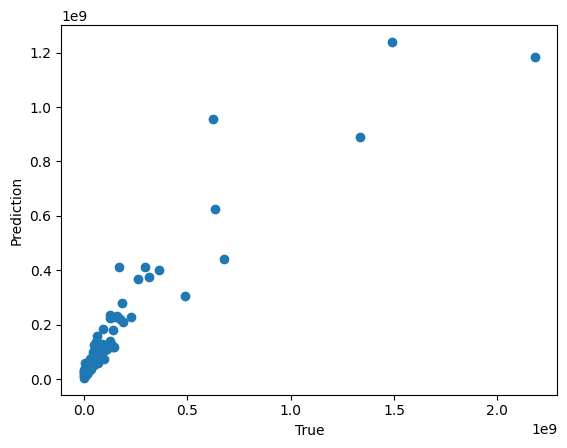

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

# split the data into training and testing and set the radnom state to be 886
X = fa[['Population', 'Year']]
y = fa['MME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=886)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
#print('Accuracy: ', accuracy_score(y_test, y_pred))


plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()


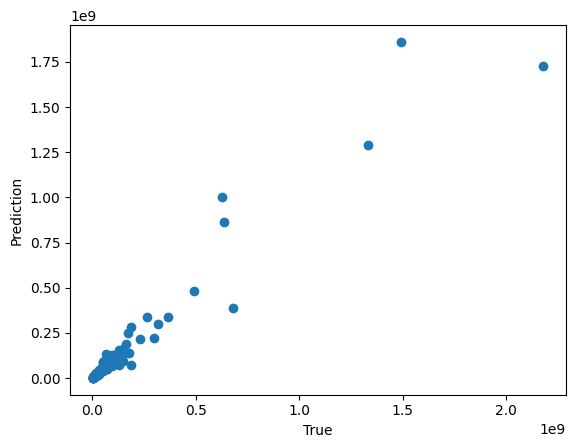

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split the data into training and testing and set the radnom state to be 886
X = fa[['Population', 'Year']]
y = fa['MME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=886)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

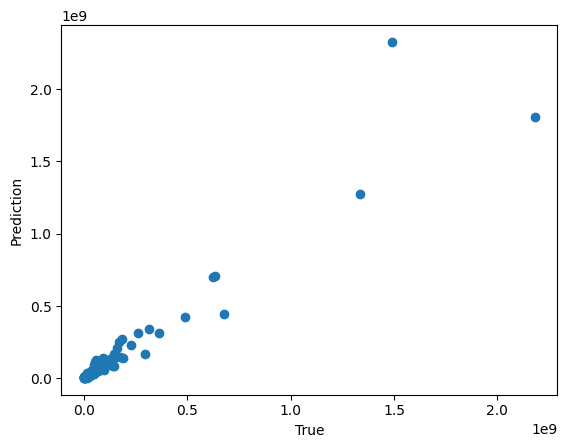

In [27]:
# use another model to predict the MME
from sklearn.ensemble import GradientBoostingRegressor

# split the data into training and testing and set the radnom state to be 886
X = fa[['Population', 'Year']]
y = fa['MME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=886)
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()


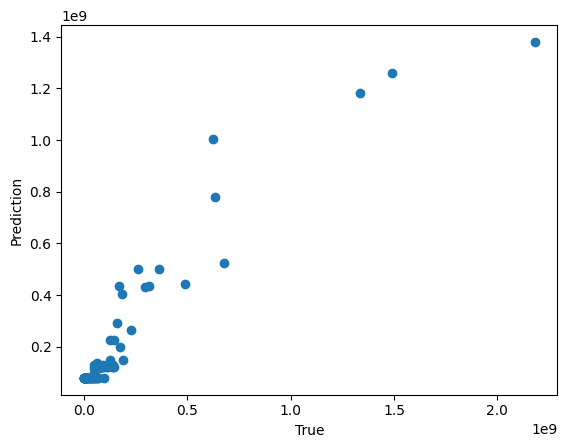

In [31]:
from sklearn.ensemble import AdaBoostRegressor

# split the data into training and testing and set the radnom state to be 886  
X = fa[['Population', 'Year']]
y = fa['MME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=886)
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()


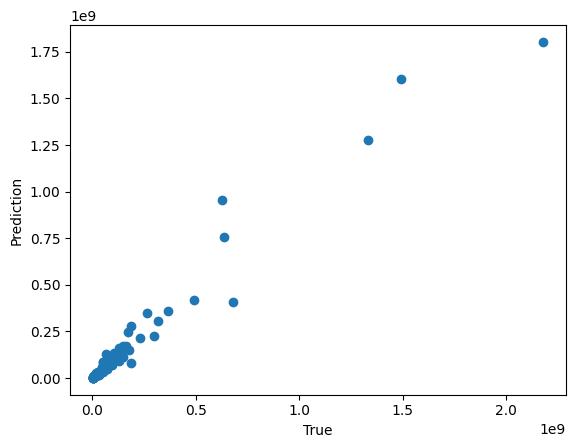

In [30]:
from sklearn.ensemble import BaggingRegressor

# split the data into training and testing and set the radnom state to be 886
X = fa[['Population', 'Year']]
y = fa['MME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=886)
br = BaggingRegressor()
br.fit(X_train, y_train)
y_pred = br.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

### The following are the controlled states for Florida

In [7]:
fa_compare = pd.read_csv('df_florida_comparison_grouped.txt')
fa_compare.head()

,Year,State,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME
0,2007,California,CA,ALAMEDA,1455715,2007,5.076008e+08
1,2007,California,CA,AMADOR,38756,2007,2.215511e+07
2,2007,California,CA,BUTTE,217469,2007,1.673523e+08
3,2007,California,CA,CALAVERAS,46268,2007,2.312143e+07
4,2007,California,CA,COLUSA,21075,2007,5.569719e+06


In [8]:
fa_compare[fa_compare['Year'] >= 2010].describe()[['MME']]

,MME
count,3.950000e+02
mean,1.456778e+08
std,2.635363e+08
min,0.000000e+00
25%,1.654260e+07
50%,3.781170e+07
75%,1.545487e+08
max,1.847920e+09


In [9]:
fa_compare[fa_compare['Year'] < 2010].describe()[['MME']]


,MME
count,3.960000e+02
mean,1.160259e+08
std,2.149367e+08
min,0.000000e+00
25%,1.308693e+07
50%,3.183289e+07
75%,1.246261e+08
max,1.768168e+09


In [34]:
# use altair to plot the MME
alt.Chart(fa_compare).mark_bar().encode(
    alt.X('MME', bin=alt.Bin(maxbins=100)),
    y='count()'
).properties(
    width=600,
    height=400
)


alt.Chart(...)

## Section 2: Data Load for Washington

In [10]:
wash = pd.read_csv('df_washington_only_grouped.txt')
wash.head()

,Year,State,BUYER_COUNTY,Population,T_YEAR,MME
0,2009,Washington,ADAMS,18405,2009,3836.773950
1,2009,Washington,ASOTIN,21415,2009,9136.063605
2,2009,Washington,BENTON,171122,2009,56739.019412
3,2009,Washington,CHELAN,71679,2009,24818.139466
4,2009,Washington,CLALLAM,71077,2009,52228.389902


In [11]:
wash.describe()[['MME']]

,MME
count,234.000000
mean,63567.692514
std,116009.430946
min,761.058525
25%,7838.791635
50%,21408.788803
75%,59372.280877
max,646956.449602


In [12]:
wash[wash['Year'] >= 2010].describe()[['MME']]

,MME
count,195.000000
mean,63538.504448
std,115531.981316
min,786.099825
25%,7893.078218
50%,21411.378332
75%,60598.072516
max,646956.449602


In [13]:
wash[wash['Year'] < 2010].describe()[['MME']]

,MME
count,39.000000
mean,63713.632843
std,119902.911827
min,761.058525
25%,7111.884548
50%,19808.055739
75%,54483.704657
max,627939.381922


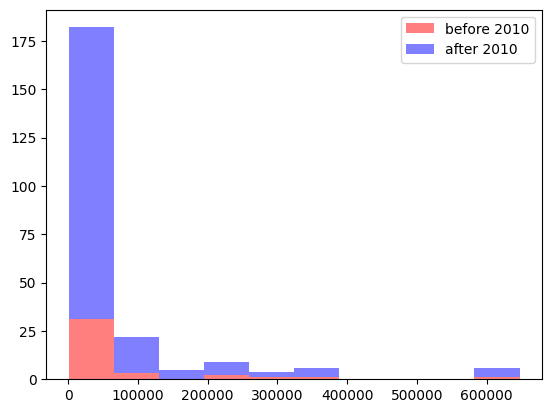

In [45]:
x = wash[wash['Year'] < 2010]['MME']
y = wash[wash['Year'] >= 2010]['MME']
plt.hist([x, y], stacked=True, color = ['r','b'], label = ['before 2010','after 2010'], alpha=0.5)
plt.legend(loc='upper right')


In [35]:
alt.Chart(wash).mark_bar().encode(
    alt.X('MME', bin=alt.Bin(maxbins=100)),
    y='count()'
).properties(
    width=600,
    height=400
)

alt.Chart(...)

### The controlled states for Washington is loaded below

In [14]:
wash_compare = pd.read_csv('df_washington_comparison_grouped.txt')
wash_compare.head()

,Year,State,BUYER_COUNTY,Population,T_YEAR,MME
0,2009,Hawaii,HAWAII,183629,2009,70120.249951
1,2009,Hawaii,HONOLULU,943177,2009,142647.388839
2,2009,Hawaii,KAUAI,66518,2009,44348.058012
3,2009,Hawaii,MAUI,153300,2009,93640.833898
4,2009,Iowa,ADAIR,7676,2009,1373.040080


In [15]:
wash_compare.describe()[['MME']]

,MME
count,4247.000000
mean,15035.924641
std,40177.969788
min,0.000000
25%,913.609875
50%,2658.222525
75%,10141.831446
max,392790.300685


In [16]:
wash_compare[wash_compare['Year'] >= 2010].describe()[['MME']]

,MME
count,3540.000000
mean,15323.346722
std,40660.857840
min,0.000000
25%,957.789773
50%,2755.961160
75%,10441.894991
max,392790.300685


In [17]:
wash_compare[wash_compare['Year'] < 2010].describe()[['MME']]

,MME
count,707.000000
mean,13596.781547
std,37661.509738
min,0.000000
25%,770.370546
50%,2265.758175
75%,8884.104424
max,382503.204788


In [36]:
alt.Chart(wash_compare).mark_bar().encode(
    alt.X('MME', bin=alt.Bin(maxbins=100)),
    y='count()'
).properties(
    width=600,
    height=400
)

alt.Chart(...)

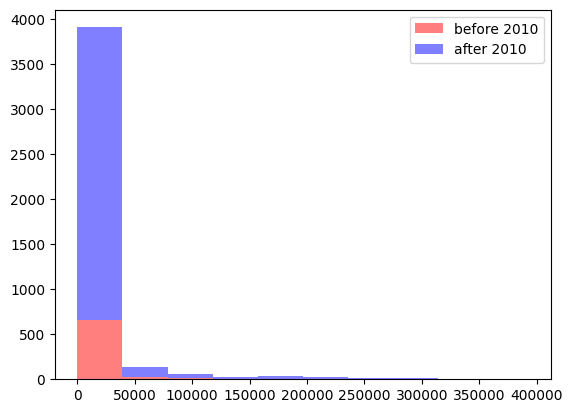

In [46]:
x2 = wash_compare[wash_compare['Year'] < 2010]['MME']
y2 = wash_compare[wash_compare['Year'] >= 2010]['MME']
plt.hist([x2, y2], stacked=True, color = ['r','b'], label = ['before 2010','after 2010'], alpha=0.5)
plt.legend(loc='upper right')